<a href="https://colab.research.google.com/github/irehdezr/guac-irehdezr/blob/master/Ejercicio_PPS_7_Selecci%C3%B3n_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[SIMULACION DE SELECCION NATURAL](https://phet.colorado.edu/sims/html/natural-selection/latest/natural-selection_en.html)

# **EXPLICACION PHET**

##Temas

1. **Una mutación** es un cambio en la secuencia de ADN que puede ocurrir de forma natural o debido a la exposición a ciertos agentes, como radiación o productos químicos. Las mutaciones pueden ser beneficiosas, perjudiciales o neutrales, y pueden tener un impacto en las características físicas o las enfermedades que pueden desarrollar los organismos.

2. **La genética** es la rama de la biología que estudia la herencia y la variación de los caracteres biológicos de los organismos. Esto incluye el estudio de los genes, que son las unidades de información hereditaria que se transmiten de una generación a otra.

3. **La selección** se refiere al proceso por el cual ciertas características de los organismos se transmiten a la siguiente generación a una tasa mayor que otras debido a que proporcionan una ventaja selectiva en el entorno en el que viven. Esto puede ser el resultado de la selección natural, en la cual los organismos con características beneficiosas tienen más éxito reproductivo, o la selección artificial, en la cual los seres humanos intervienen en la reproducción de los organismos para obtener ciertas características deseables.






##Determinar qué mutaciones son favorecidas por los agentes de selección de depredadores y variedad de alimentos y qué mutaciones son neutrales.

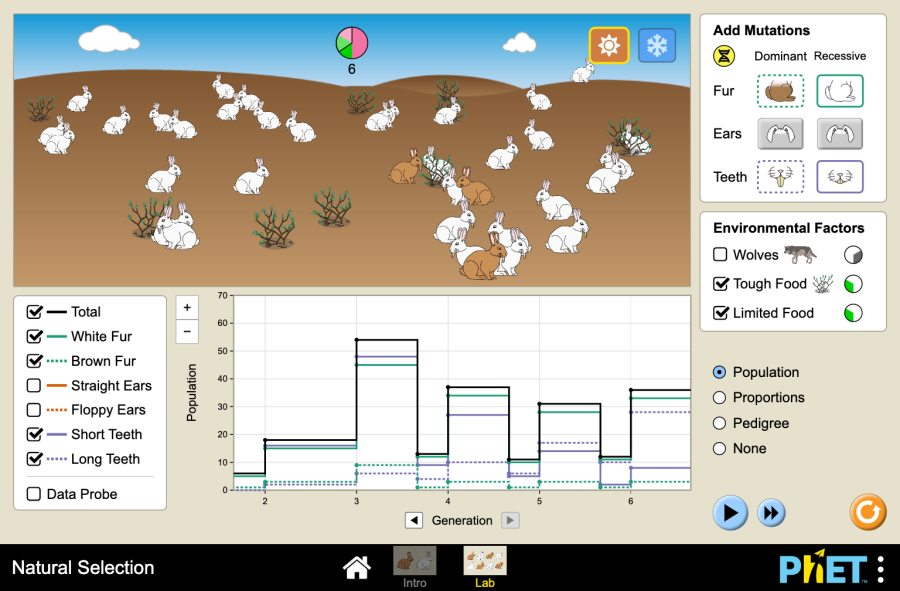

##Describir qué rasgos cambian la supervivencia de un organismo en diferentes ambientes.
##Experimente con entornos que produzcan una población estable de conejos, una población que se extinga y una población que se apodere del mundo

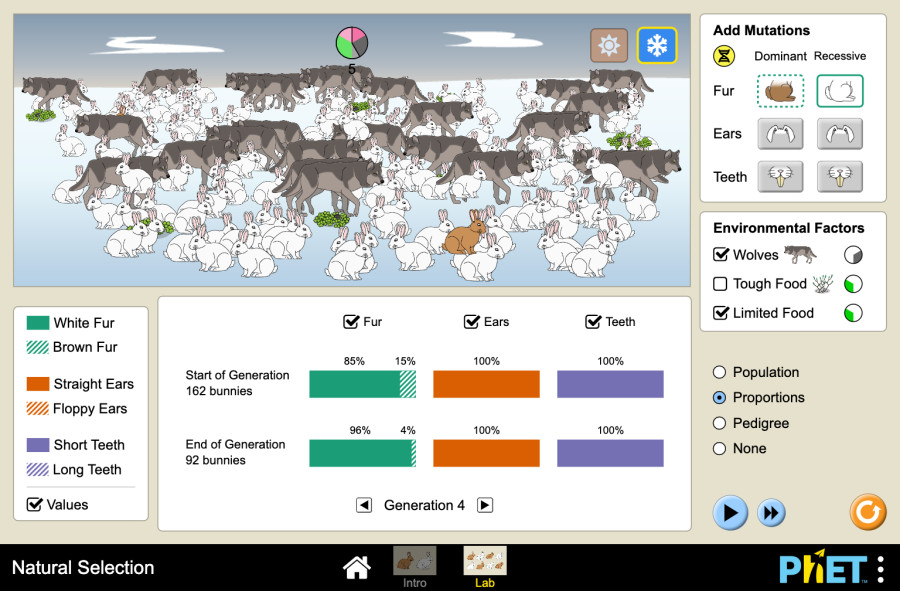

##Seguimiento de genes a través de múltiples generaciones.
##Compare cómo se transmiten los genes dominantes y recesivos a la descendencia.


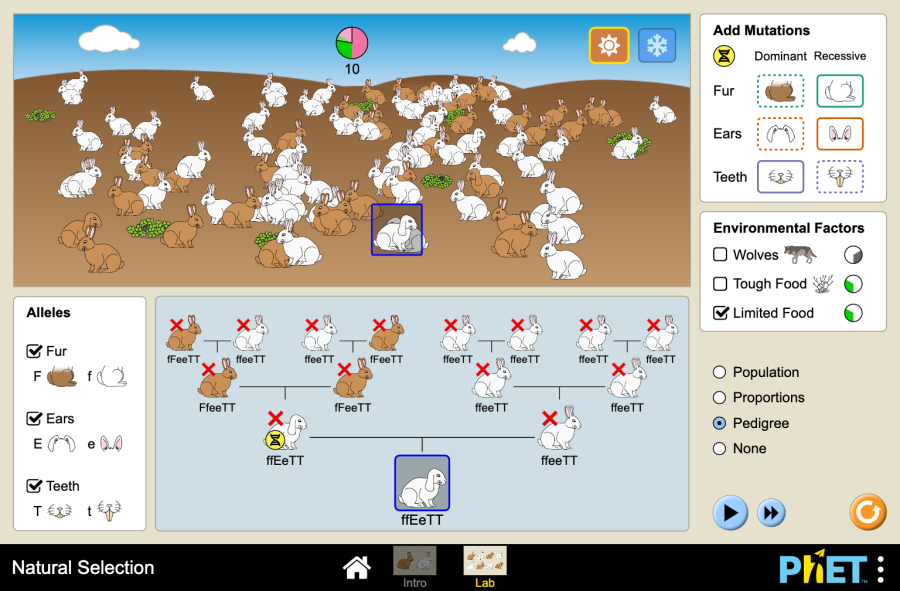

#**EJERCICIO PYTHON**

##  Este ejercicio permite a los estudiantes explorar cómo los factores ambientales influyen en la supervivencia y reproducción de los individuos en una población. Los estudiantes pueden ajustar los diferentes factores ambientales y ver cómo afectan a la evolución de la población a lo largo del tiempo. (Ejemplo de mutación para Conejos)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

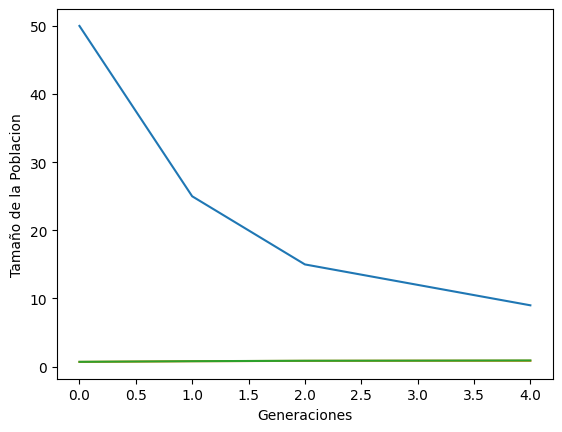

In [1]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

# Definimos los parámetros de la simulación
tamano_poblacion = 200
cantidad_alimento = 100
prob_mutacion = 0.01
cantidad_iteraciones = 5

# Definimos la clase de los organismos
class Organismo:
    def __init__(self, prob_sobrevivir, velocidad_reproduccion):
        self.prob_sobrevivir = prob_sobrevivir
        self.velocidad_reproduccion = velocidad_reproduccion

    def reproducirse(self):
        if random() < self.velocidad_reproduccion:
            return Organismo(self.prob_sobrevivir, self.velocidad_reproduccion)
        else:
            return None

    def sobrevivir(self, cantidad_alimento):
        prob_sobrevivir_ajustada = self.prob_sobrevivir * (cantidad_alimento / 100.0)
        if random() < prob_sobrevivir_ajustada:
            return True
        else:
            return False

# Definimos la función para mutar un organismo
def mutar_organismo(organismo, prob_mutacion):
    if random() < prob_mutacion:
        return Organismo(organismo.prob_sobrevivir + (random() * 0.2 - 0.1), organismo.velocidad_reproduccion + (random() * 0.2 - 0.1))
    else:
        return organismo

# Creamos la población inicial
poblacion = [Organismo(random(), random()) for i in range(tamano_poblacion)]

# Creamos las listas para almacenar la evolución de la población
poblacion_tamano = []
poblacion_promedio_sobrevivencia = []
poblacion_promedio_velocidad = []

# Ejecutamos la simulación
for i in range(cantidad_iteraciones):
    # Calculamos la cantidad de alimento disponible
    cantidad_alimento = 100 - i

    # Filtramos los organismos que sobreviven y se reproducen
    poblacion = [organismo.reproducirse() for organismo in poblacion if organismo.sobrevivir(cantidad_alimento)]
    poblacion = [organismo for organismo in poblacion if organismo is not None]

    # Mutamos algunos organismos al azar
    poblacion = [mutar_organismo(organismo, prob_mutacion) for organismo in poblacion]

    # Almacenamos la evolución de la población
    poblacion_tamano.append(len(poblacion))
    poblacion_promedio_sobrevivencia.append(np.mean([organismo.prob_sobrevivir for organismo in poblacion]))
    poblacion_promedio_velocidad.append(np.mean([organismo.velocidad_reproduccion for organismo in poblacion]))

# Graficamos la evolución de la población
plt.figure()
plt.plot(poblacion_tamano, label='Tamaño de la población')
plt.plot(poblacion_promedio_sobrevivencia, label='Probabilidad de sobrevivencia promedio')
plt.plot(poblacion_promedio_velocidad, label='Velocidad de reproducción promedio')
plt.xlabel('Generaciones')
plt.ylabel('Tamaño de la Poblacion')
plt
